In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

%matplotlib inline

In [47]:
Startup=pd.read_csv("50_Startups.csv")

In [48]:
Startup

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Data Understanding

In [49]:
Startup.isna().sum()

R_D_Spend          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [50]:
Startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_D_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [51]:
Startup.corr()

,R_D_Spend,Administration,Marketing_Spend,Profit
R_D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [52]:
Startup.columns

Index(['R_D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

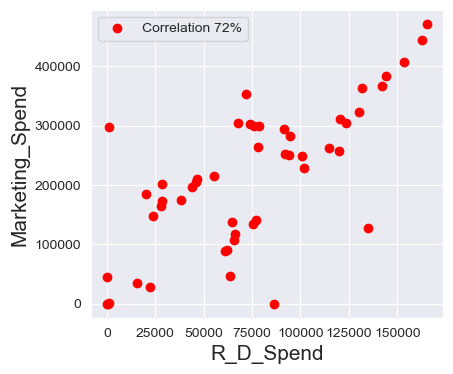

In [53]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(Startup["R_D_Spend"],Startup["Marketing_Spend"],color="red",label="Correlation 72%")
plt.xlabel("R_D_Spend",size=15)
plt.ylabel("Marketing_Spend",size=15)
plt.legend(loc="best")
plt.show()

<AxesSubplot:>

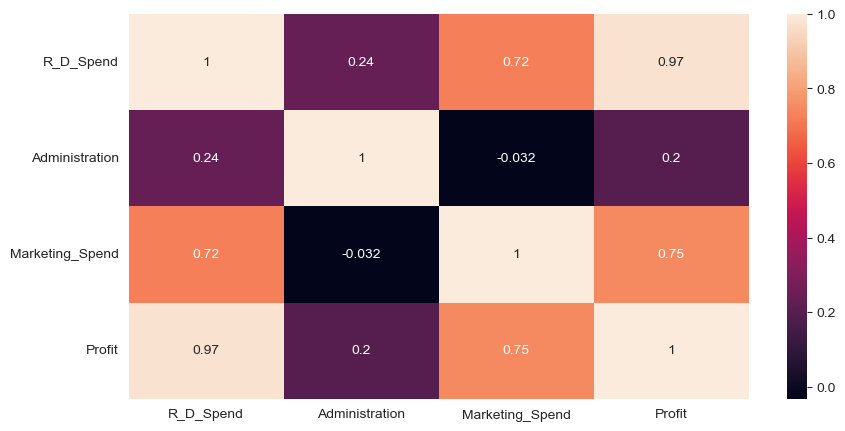

In [54]:
plt.figure(figsize=(10,5))
sns.heatmap(Startup.corr(),annot=True)

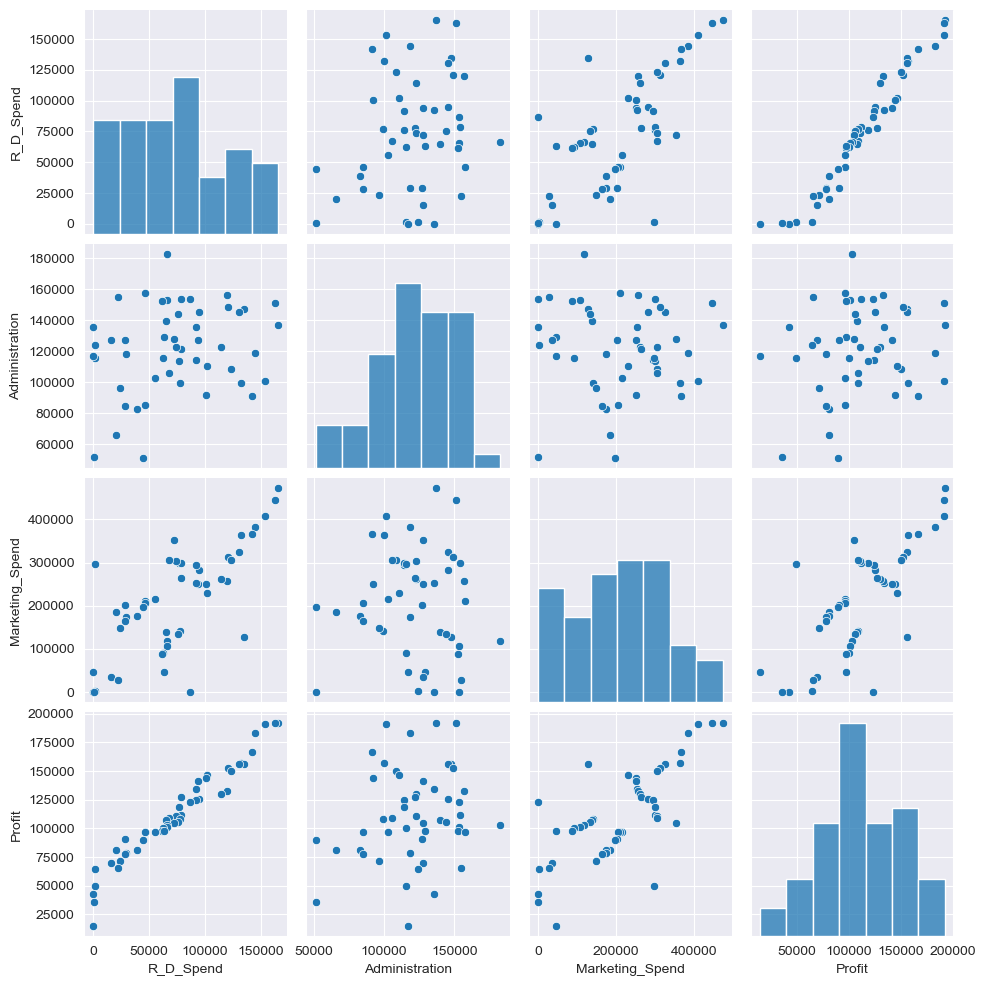

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(Startup)

In [11]:
Startup.columns

Index(['R_D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

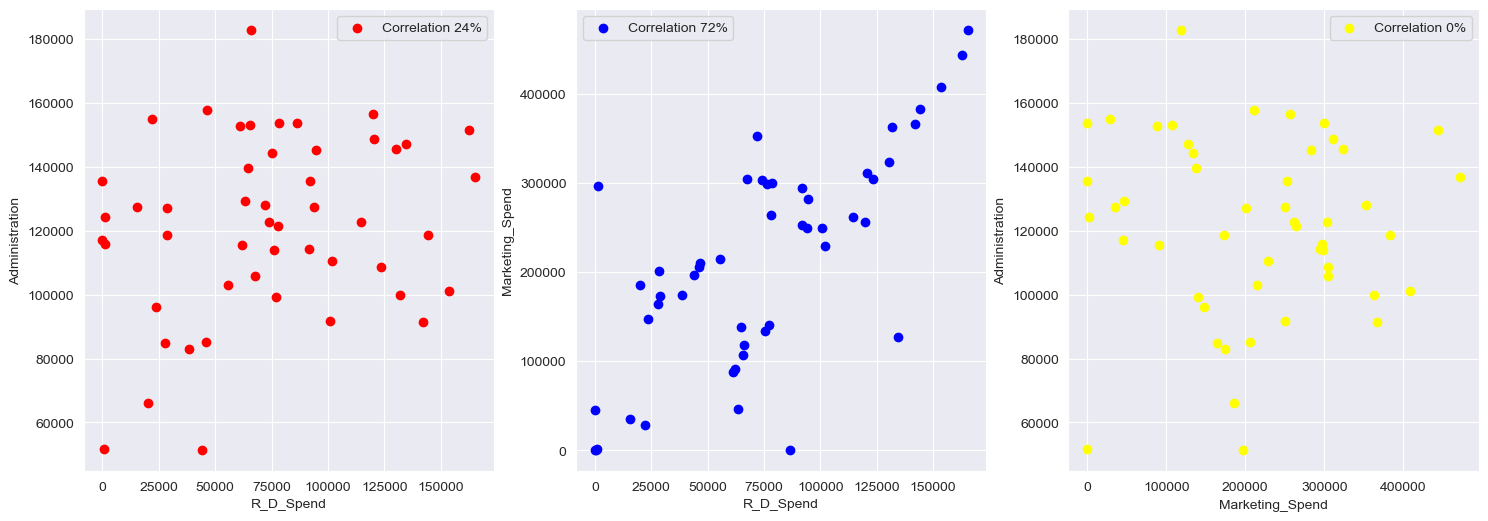

In [17]:
#plotting subplot of all features with their correlation
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.scatter(Startup['R_D_Spend'],Startup['Administration'],color='Red',label='Correlation 24%')
plt.xlabel('R_D_Spend')
plt.ylabel('Administration')
plt.legend(loc='best')
plt.subplot(1,3,2)
plt.scatter(Startup['R_D_Spend'],Startup['Marketing_Spend'],color='Blue',label='Correlation 72%')
plt.xlabel('R_D_Spend')
plt.ylabel('Marketing_Spend')
plt.legend(loc='best')
plt.subplot(1,3,3)
plt.scatter(Startup['Marketing_Spend'],Startup['Administration'],color='Yellow',label='Correlation 0%')
plt.xlabel('Marketing_Spend')
plt.ylabel('Administration')
plt.legend(loc='best')

# Building The Model

In [18]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=Startup).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        15:39:37   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_D_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model.rsquared

0.9507459940683246

In [21]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [22]:
model.params

Intercept          50122.192990
R_D_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [23]:
Startup.columns

Index(['R_D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

# vif calculation

In [24]:
rsq_RD=smf.ols('R_D_Spend~Administration+Marketing_Spend',data=Startup).fit().rsquared
vif_RD=(1/1-rsq_RD)

rsq_AD=smf.ols('Administration~R_D_Spend+Marketing_Spend',data=Startup).fit().rsquared
vif_AD=(1/1-rsq_AD)

rsq_MR=smf.ols('Marketing_Spend~R_D_Spend+Administration',data=Startup).fit().rsquared
vif_MR=(1/1-rsq_MR)


#storing vif values in a data frame
d1={'variables':['R_D_Spend', 'Administration', 'Marketing_Spend'],'VIF':[vif_RD,vif_AD,vif_MR]}
vif_frame=pd.DataFrame(d1)
vif_frame

,variables,VIF
0,R_D_Spend,0.405038
1,Administration,0.850998
2,Marketing_Spend,0.429780


In [25]:
#there is no multicollinearity 

# Residual analysis

# Test for Normality of Residuals (Q-Q Plot)¶

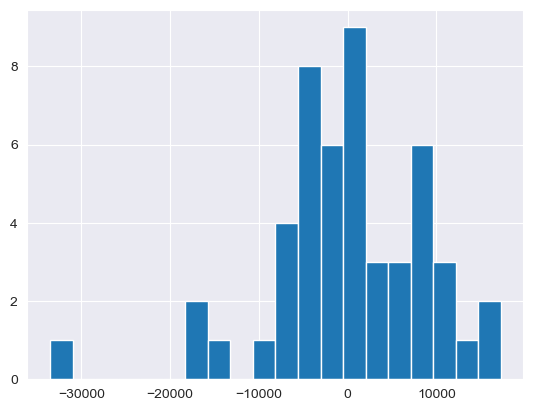

In [26]:
plt.hist(model.resid,bins=20)
plt.show()

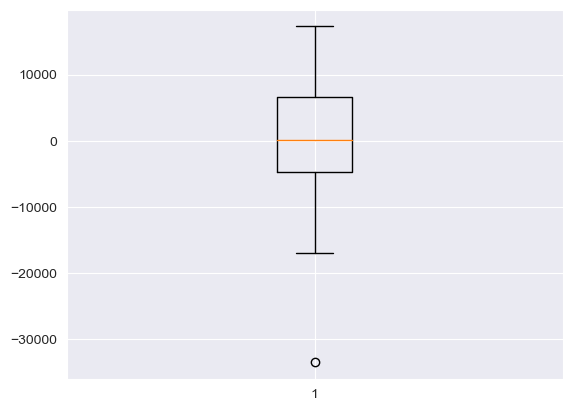

In [27]:
plt.boxplot(model.resid)
plt.show()

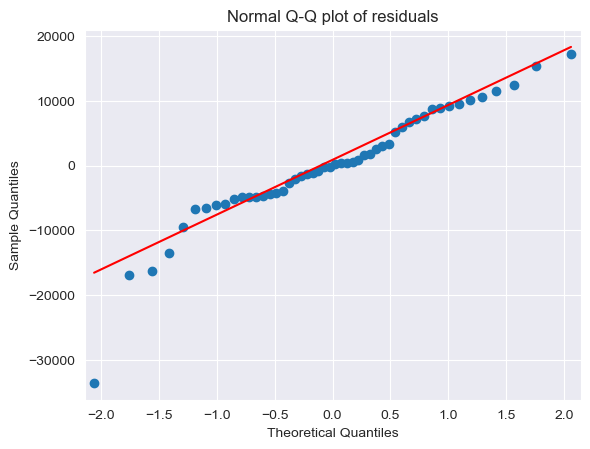

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [29]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

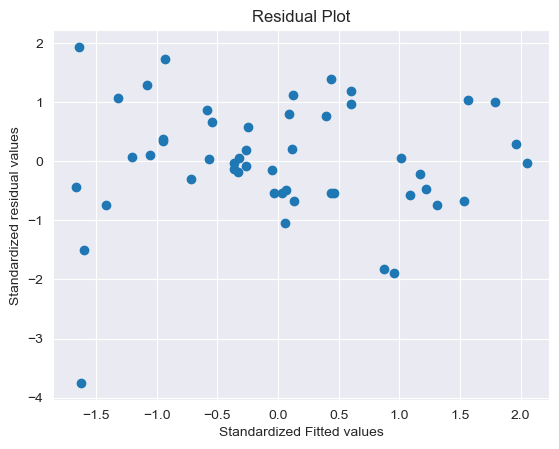

In [30]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

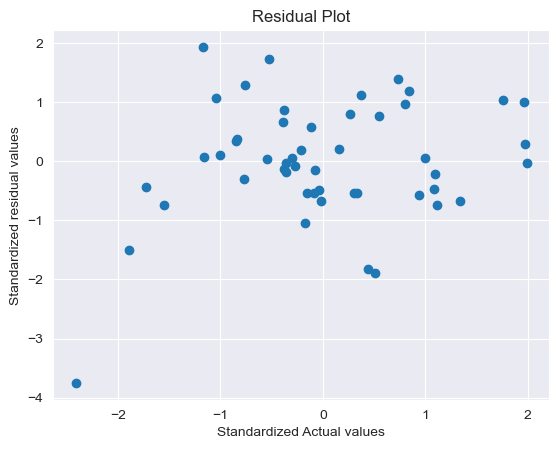

In [31]:
 plt.scatter(get_standardized_values(Startup.Profit),
             get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Actual values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regression

eval_env: 1


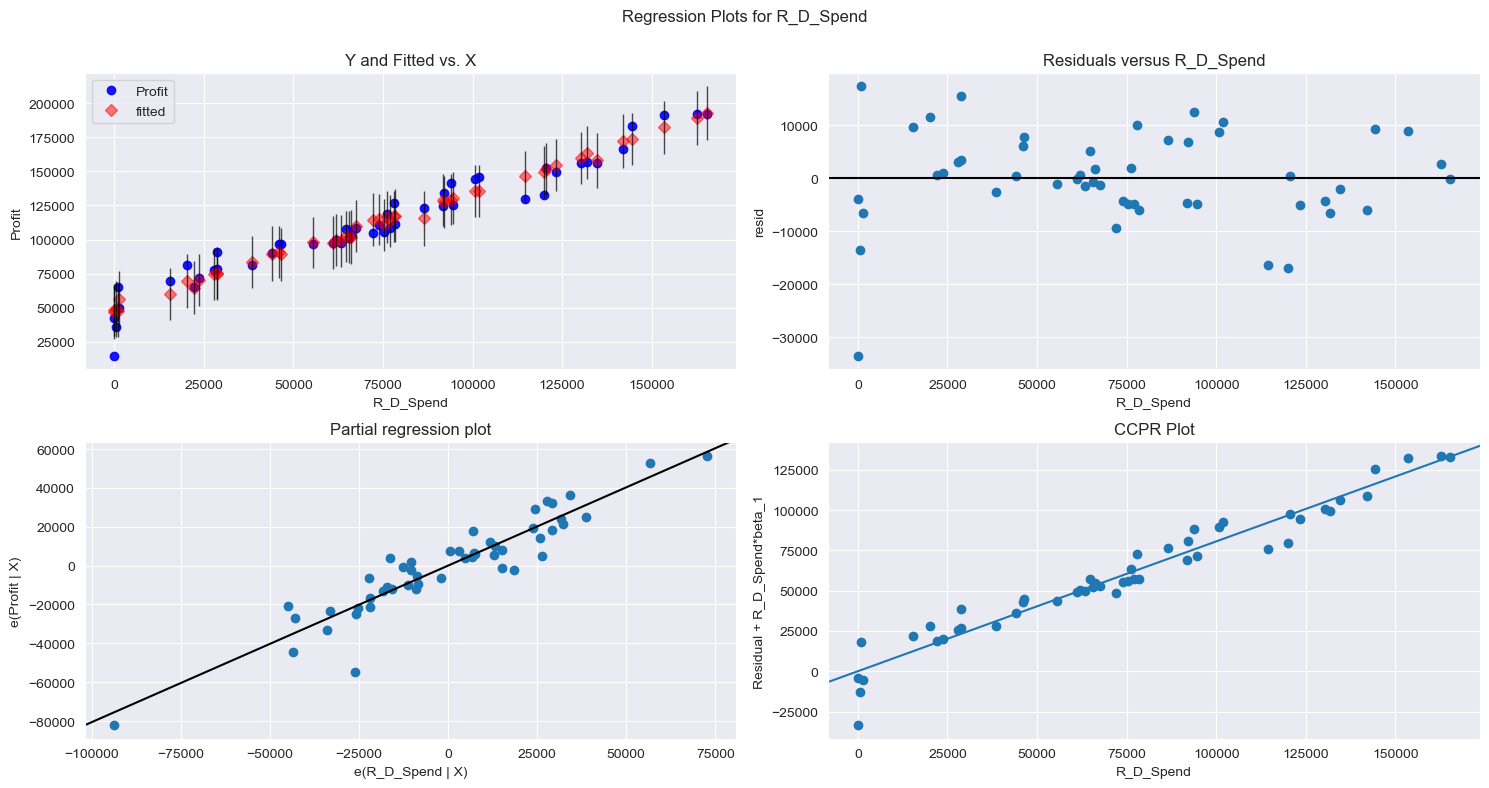

In [32]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "R_D_Spend", fig=fig)
plt.show()

eval_env: 1


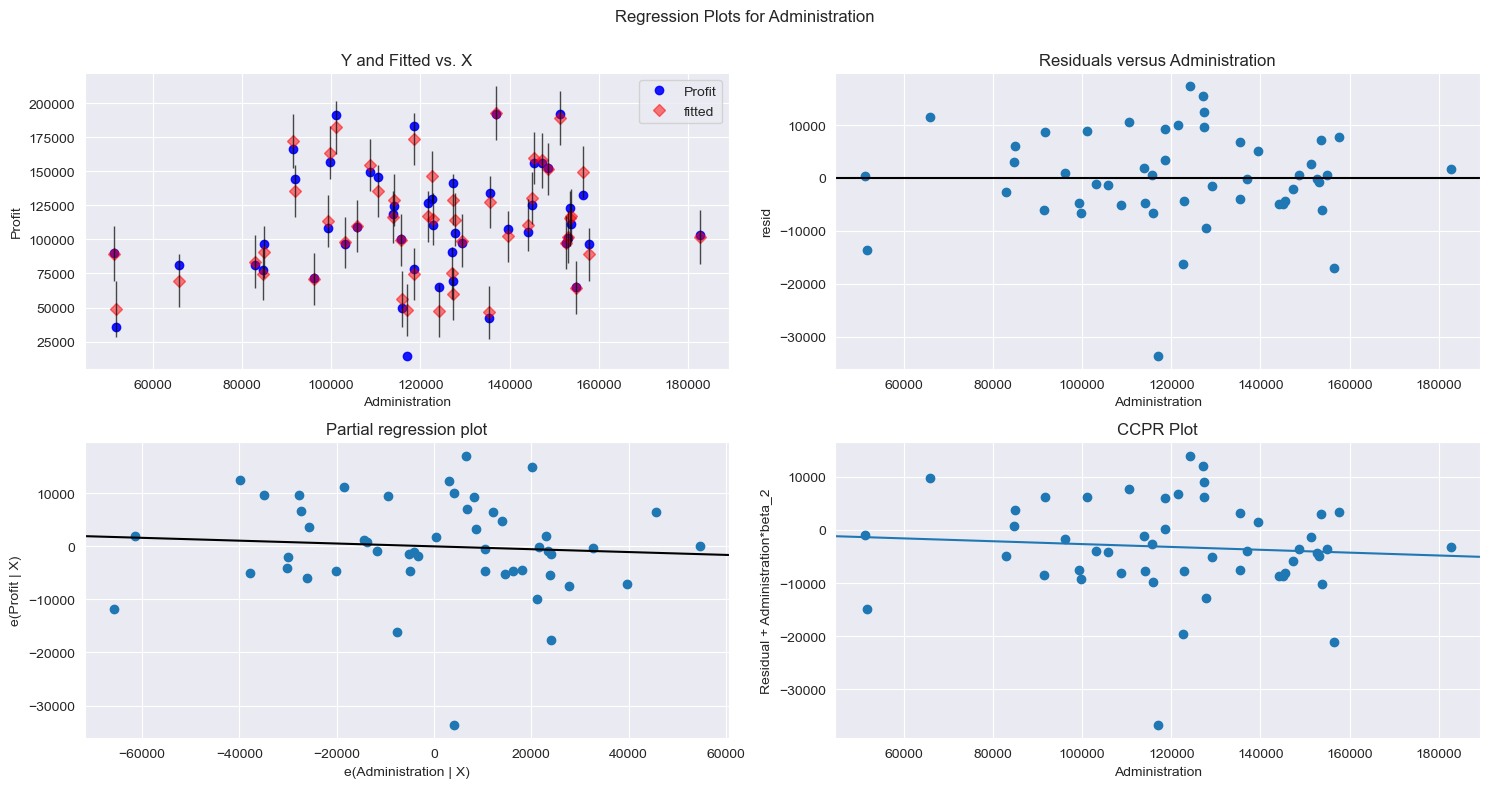

In [33]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


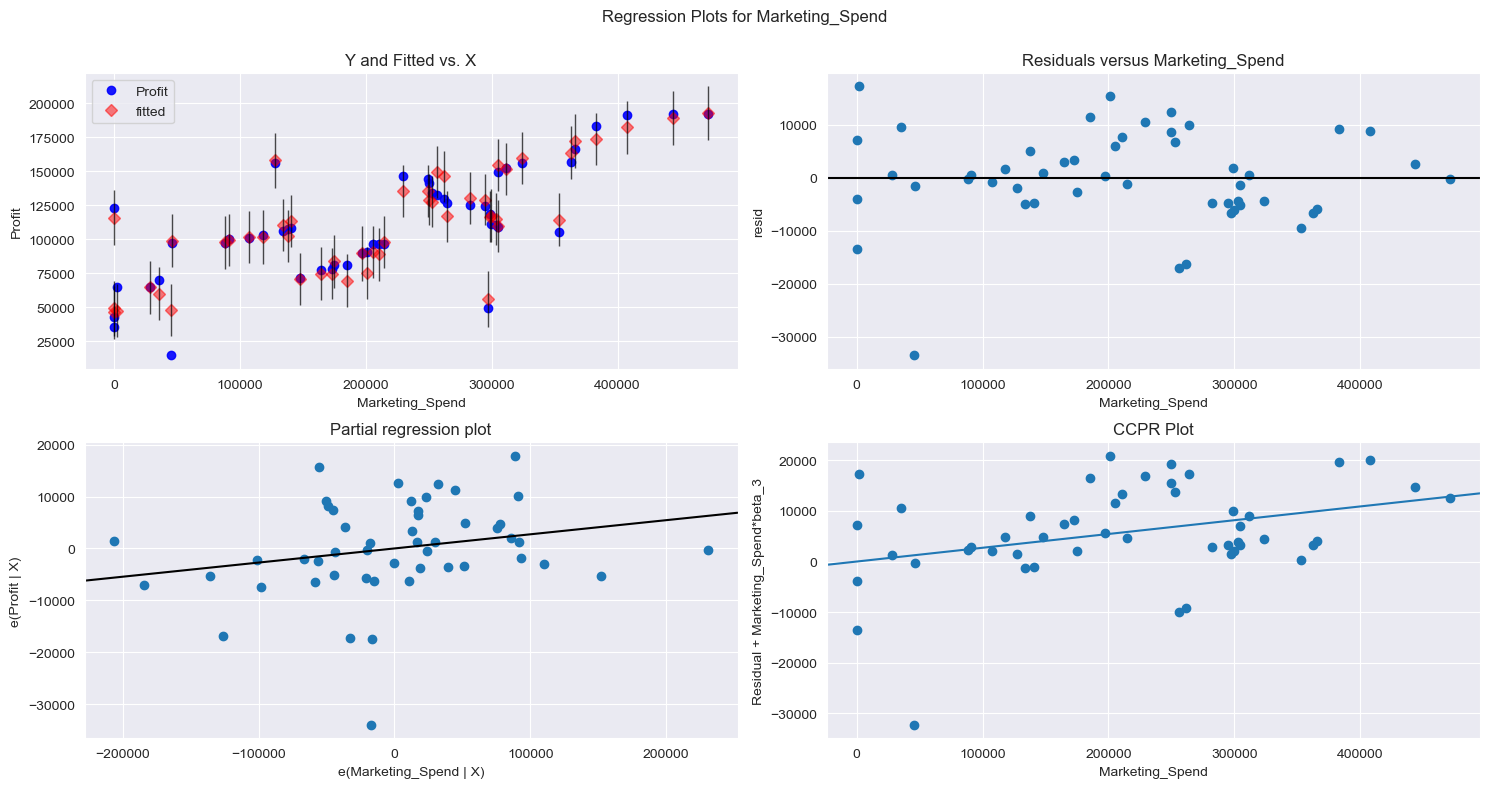

In [34]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

# Detecting Influencers/Outliers


# cooks distance

In [39]:
Startup.shape

(50, 5)

In [38]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [40]:
K=3
N=50
3*(K+1)/N

0.24

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


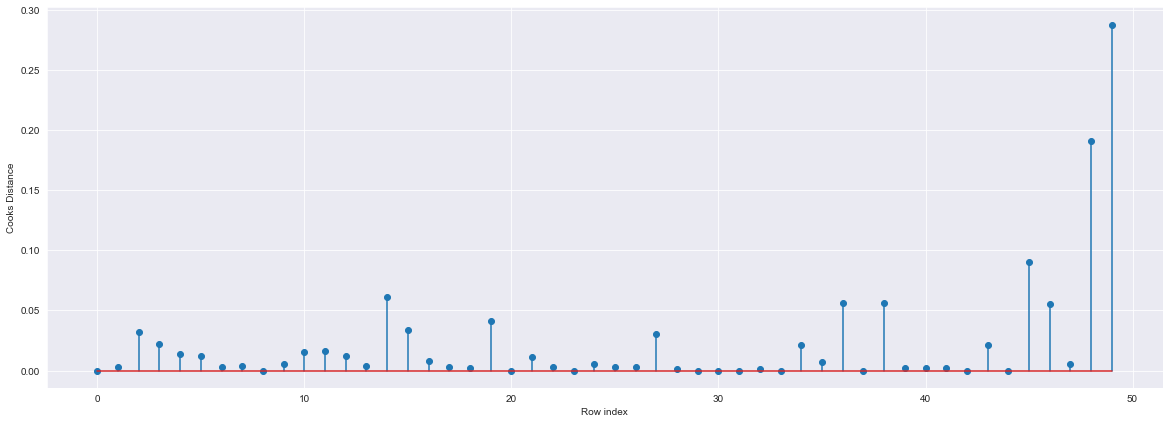

In [42]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(Startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432623)

In [44]:
np.where(c>0.24)

(array([49], dtype=int64),)

# Improving the model

In [37]:
#Load the data
Startup_new = pd.read_csv("50_Startups.csv")

In [38]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Startup1=Startup_new.drop(Startup_new.index[[49]],axis=0).reset_index()

In [39]:
Startup1.shape

(49, 6)

In [40]:
#Drop the original index
Startup1=Startup1.drop(['index'],axis=1)

In [41]:
Startup1

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Final Model Building

In [42]:
final_model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=Startup1).fit()

In [43]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           8.85e-32
Time:                        15:41:38   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
R_D_Spend           0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
(final_model.rsquared,final_model.aic)

(0.9613162435129847, 1020.5652974526367)